# Fast Light Plots

In [1]:
from maxwellbloch import mb_solve, fixed
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pal = sns.color_palette("deep", 10)

## Fig 1: Pulse in Vacuum

Will be animation but this is the system (maybe longer time)

In [63]:
mbs_fwhm1_N0 = mb_solve.MBSolve().from_json('fast-light-fwhm1-N0-movie.json')

In [64]:
time Omegas_zt, states_zt = mbs_fwhm1_N0.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 2.48 ms, sys: 6 ms, total: 8.48 ms
Wall time: 10.9 ms


In [65]:
speed_of_light = 0.2 # [L Γ]

tlist_fixed_frame = fixed.t_list(mbs_fwhm1_N0, speed_of_light)
field_fixed_frame = fixed.rabi_freq_abs(mbs_fwhm1_N0, 0, speed_of_light, interp_kind='cubic')

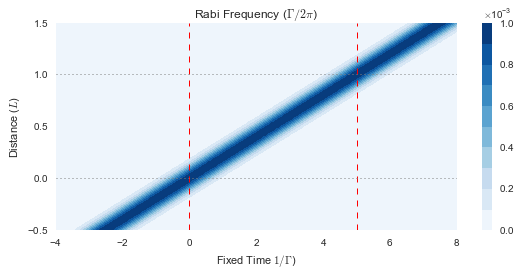

In [66]:
fig = plt.figure(2, figsize=(8, 4))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mbs_fwhm1_N0.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time $1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
ax.set_xlim(-4, 8)
plt.colorbar(cf)

fig.tight_layout()

plt.savefig('fast-light-fig-1.png');

## Fig 2: Pulse resonant with atoms, fast light

N = 1, T_w = 1
Will be animation

In [57]:
mb_solve_fwhm1_N1 = mb_solve.MBSolve().from_json('fast-light-fwhm1-N1-movie.json')

In [59]:
time Omegas_zt, states_zt = mb_solve_fwhm1_N1.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 2.62 ms, sys: 3.09 ms, total: 5.7 ms
Wall time: 4.22 ms


In [60]:
profile_in_fwhm1_N1 = np.real(mb_solve_fwhm1_N1.Omegas_zt[0, 0])
peak_in_fwhm1_N1 = mb_solve_fwhm1_N1.tlist[np.argmax(profile_in_fwhm1_N1)]
print(peak_in_fwhm1_N1)

profile_out_fwhm1_N1 = np.real(mb_solve_fwhm1_N1.Omegas_zt[0, -1])
peak_out_fwhm1_N1 = mb_solve_fwhm1_N1.tlist[np.argmax(profile_out_fwhm1_N1)]
print(peak_out_fwhm1_N1)

0.0
-0.12


In [61]:
speed_of_light = 0.2 # [L Γ]

tlist_fixed_frame = fixed.t_list(mb_solve_fwhm1_N1, speed_of_light)
field_fixed_frame = fixed.rabi_freq_abs(mb_solve_fwhm1_N1, 0, speed_of_light, interp_kind='cubic')

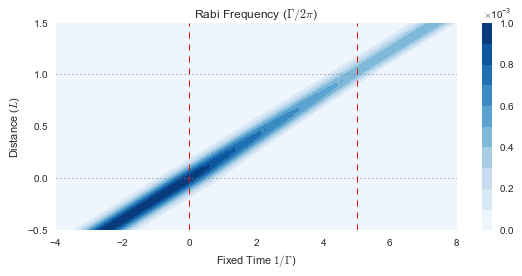

In [62]:
fig = plt.figure(2, figsize=(8, 4))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mb_solve_fwhm1_N1.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time $1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
ax.set_xlim(-4, 8)
plt.colorbar(cf)

plt.tight_layout()

plt.savefig('fast-light-fig-2.png');

## Fig 3: End Profiles of Fig 2

These should actually be fixed frame comparisons

In [12]:
t = np.flipud(mb_solve_fwhm1_N1.tlist) # Reverse the time for pulse advancement
y1 = profile_in_fwhm1_N1/np.max(profile_in_fwhm1_N1)
y2 = profile_out_fwhm1_N1/np.max(profile_out_fwhm1_N1)

In [13]:
len(t)

101

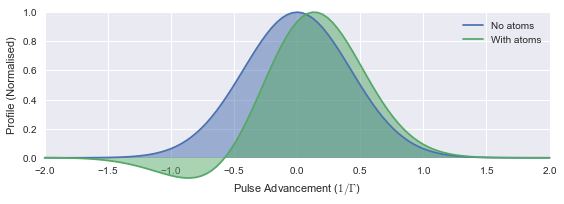

In [14]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
ax.plot(t, y1, label='No atoms', clip_on=False)
ax.plot(t, y2, label='With atoms', clip_on=False)
ax.fill_between(t, 0., y1, alpha=0.5, color=pal[0], clip_on=False, interpolate=True)
ax.fill_between(t, 0., y2, alpha=0.5, color=pal[1], clip_on=False, interpolate=True)
ax.set_xlabel('Pulse Advancement ($1/\Gamma$)')
ax.set_ylabel('Profile (Normalised)')
ax.set_xlim([-2, 2])
ax.set_ylim([0.0, 1.0])

ax.legend()

fig.tight_layout()

plt.savefig('fast-light-fig-3.png');

## Fig 4: Refractive Index

In [15]:
from maxwellbloch import spectral

In [16]:
mb_solve_fwhm1_N1_spectral = mb_solve.MBSolve().from_json('fast-light-fwhm1-N1-spectral.json')

In [17]:
Omegas_zt, states_zt = mb_solve_fwhm1_N1_spectral.mbsolve(recalc=False)

Loaded tuple object.


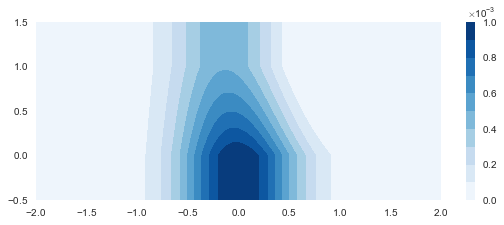

In [18]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_fwhm1_N1_spectral.tlist, mb_solve_fwhm1_N1_spectral.zlist, 
                 np.abs(mb_solve_fwhm1_N1_spectral.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_xlim(-2, 2)
plt.colorbar(cf);

In [19]:
freq_list = spectral.freq_list(mb_solve_fwhm1_N1_spectral)
# n_imag = spectral.dispersion(mb_solve_fwhm1_N1_spectral, 0, -1)
n_real = np.sqrt(1 + spectral.dispersion(mb_solve_fwhm1_N1_spectral, 0, -1))
n_imag = np.sqrt(1 + spectral.absorption(mb_solve_fwhm1_N1_spectral, 0, -1))

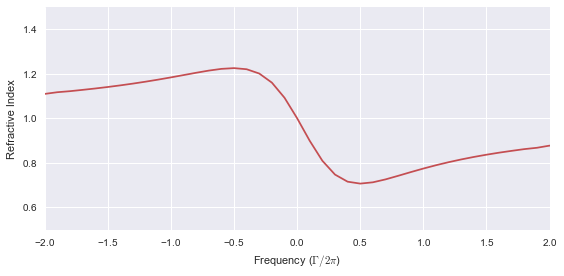

In [51]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(freq_list, n_real, color=pal[2],
        label='n real')
# ax.plot(freq_list, n_imag, color=pal[3],
#         label='n imag')
ax.set_ylim(0.5, 1.5)
ax.set_xlim(-2.0, 2.0)
ax.set_ylabel('Refractive Index')
ax.set_xlabel('Frequency ($\Gamma / 2\pi $)')

fig.tight_layout()

plt.savefig('fast-light-fig-4.png');

## Fig 5: Absorption and Dispersion Profiles

For explanation of phase velocity, group velocity, refractive index

In [24]:
mbsw = mb_solve.MBSolve().from_json('fast-light-fwhm10-N10-spectral.json')
%time _ = mbsw.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 58.7 ms, sys: 213 ms, total: 272 ms
Wall time: 337 ms


In [27]:
freq_list_w = spectral.freq_list(mbsw)
n_real_w = np.sqrt(1 + spectral.dispersion(mbsw, 0, -1))
n_imag_w = np.sqrt(1 + spectral.absorption(mbsw, 0, -1))

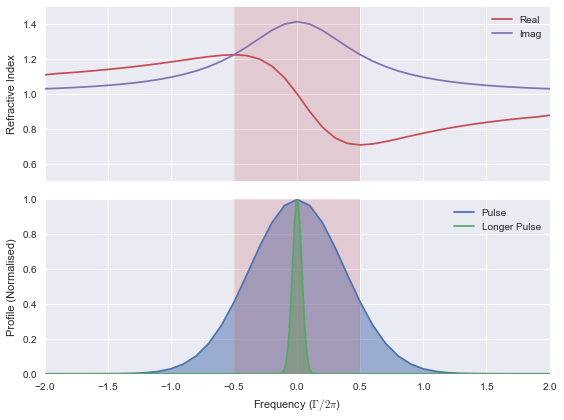

In [50]:
fig = plt.figure(2, figsize=(8, 6))
ax = fig.add_subplot(211)

freq_list = spectral.freq_list(mb_solve_fwhm1_N1_spectral)
rabi_freq_abs_0 = np.abs(spectral.rabi_freq(mb_solve_fwhm1_N1_spectral, 0))[0]

freq_list_w = spectral.freq_list(mbsw)
rabi_freq_abs_0_w = np.abs(spectral.rabi_freq(mbsw, 0))[0]

# t_text = ax.text(0.02, 0.90, '(a)', transform=ax.transAxes)

ax.plot(freq_list, n_real, color=pal[2],
        label='Real')
ax.plot(freq_list, n_imag, color=pal[3],
        label='Imag')

ax.set_xlim(-2.0, 2.0)
ax.set_ylim(0.5, 1.5)
ax.tick_params(labelbottom='off') 
ax.axvspan(-0.5, 0.5, alpha=0.2, color=pal[2])

ax.set_ylabel('Refractive Index')

ax.legend()

ax2 = fig.add_subplot(212)

y = rabi_freq_abs_0/np.max(rabi_freq_abs_0)
ax2.plot(freq_list, 
        y, color=pal[0],
        label='Pulse')
ax2.fill_between(freq_list, 0., y, alpha=0.5, color=pal[0], clip_on=True, interpolate=True)

yw = rabi_freq_abs_0_w/np.max(rabi_freq_abs_0_w)
ax2.plot(freq_list_w, 
        yw, color=pal[1],
        label='Longer Pulse')
ax2.fill_between(freq_list_w, 0., yw, alpha=0.5, color=pal[1], clip_on=True, interpolate=True)

ax2.axvspan(-0.5, 0.5, alpha=0.2, color=pal[2])
ax2.set_xlim(-2.0, 2.0)
ax2.set_ylim(0.0, 1.0)

ax2.set_ylabel('Profile (Normalised)')
ax2.set_xlabel('Frequency ($\Gamma/ 2\pi$)')

ax2.legend()

fig.tight_layout()

plt.savefig('fast-light-fig-5.png');

## Fig 6: Show that get better advancement with wide pulse

In [34]:
mb_solve_fwhm10_N15 = mb_solve.MBSolve().from_json('fast-light-fwhm10-N15.json')

In [35]:
mb_solve_fwhm10_N10 = mb_solve.MBSolve().from_json('fast-light-fwhm10-N10.json')

In [36]:
mb_solve_fwhm10_N15.mbsolve(recalc=False)
mb_solve_fwhm10_N10.mbsolve(recalc=False);

Loaded tuple object.
Loaded tuple object.


In [37]:
profile_in_fwhm10_N15 = np.real(mb_solve_fwhm10_N15.Omegas_zt[0, 0])
peak_in_fwhm10_N15 = mb_solve_fwhm10_N15.tlist[np.argmax(profile_in_fwhm10_N15)]
print(peak_in_fwhm10_N15)

profile_out_fwhm10_N15 = np.real(mb_solve_fwhm10_N15.Omegas_zt[0, -1])
peak_out_fwhm10_N15 = mb_solve_fwhm10_N15.tlist[np.argmax(profile_out_fwhm10_N15)]
print(peak_out_fwhm10_N15)

0.0
-4.68


In [38]:
x = np.flipud(mb_solve_fwhm10_N15.tlist) # Reverse the time for pulse advancement
y1 = profile_in_fwhm10_N15/np.max(profile_in_fwhm10_N15)
y2 = profile_out_fwhm10_N15/np.max(profile_out_fwhm10_N15)

In [42]:
profile_in_fwhm10_N10 = np.real(mb_solve_fwhm10_N10.Omegas_zt[0, 0])
peak_in_fwhm10_N10 = mb_solve_fwhm10_N10.tlist[np.argmax(profile_in_fwhm10_N10)]
print(peak_in_fwhm10_N10)

profile_out_fwhm10_N10 = np.real(mb_solve_fwhm10_N10.Omegas_zt[0, -1])
peak_out_fwhm10_N10 = mb_solve_fwhm10_N10.tlist[np.argmax(profile_out_fwhm10_N10)]
print(peak_out_fwhm10_N10)

0.0
-3.08


In [40]:
x = np.flipud(mb_solve_fwhm10_N10.tlist) # Reverse the time for pulse advancement
y1 = profile_in_fwhm10_N10/np.max(profile_in_fwhm10_N10)
y2 = profile_out_fwhm10_N10/np.max(profile_out_fwhm10_N10)

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(x, y1, label='No atoms', clip_on=False)
ax.fill_between(x, 0., y1, alpha=0.5, color=pal[0], interpolate=True)
ax.plot(x, y2, label='Atoms', clip_on=False)
ax.fill_between(x, 0., y2, alpha=0.5, color=pal[1], interpolate=True)
ax.set_xlabel('Pulse Advancement ($1/\Gamma$)')
ax.set_ylabel('Profile (Normalised)')
ax.set_xlim([-20, 20])
ax.set_ylim([0.0, 1.0])
ax.legend()

fig.tight_layout()

fig.savefig('fast-light-fig-6.png');

## Fig 7: Pulse Advancements vs Num Density

For pulses and wide pulses

See fast-light-fig-7.ipynb